In [1]:
import graphlab

# Load house and crime data

In [2]:
sales = graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv')

This non-commercial license of GraphLab Create for academic use is assigned to dmc388@cornell.edu and will expire on June 01, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1470859976.log


Finished parsing file /Users/derek/Documents/Workspace/Machine Learning/1 - Regression/Simple Linear Regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.028348 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/derek/Documents/Workspace/Machine Learning/1 - Regression/Simple Linear Regression/Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.01511 secs.

In [3]:
sales

Columns:
	HousePrice	int
	HsPrc ($10,000)	float
	CrimeRate	float
	MilesPhila	float
	PopChg	float
	Name	str
	County	str

Rows: 99

Data:
+------------+-----------------+-----------+------------+--------+------------+
| HousePrice | HsPrc ($10,000) | CrimeRate | MilesPhila | PopChg |    Name    |
+------------+-----------------+-----------+------------+--------+------------+
|   140463   |     14.0463     |    29.7   |    10.0    |  -1.0  |  Abington  |
|   113033   |     11.3033     |    24.1   |    18.0    |  4.0   |   Ambler   |
|   124186   |     12.4186     |    19.5   |    25.0    |  8.0   |   Aston    |
|   110490   |      11.049     |    49.4   |    25.0    |  2.7   |  Bensalem  |
|   79124    |      7.9124     |    54.1   |    19.0    |  3.9   | Bristol B. |
|   92634    |      9.2634     |    48.6   |    20.0    |  0.6   | Bristol T. |
|   89246    |      8.9246     |    30.8   |    15.0    |  -2.6  | Brookhaven |
|   195145   |     19.5145     |    10.8   |    20.0    |  -3.5  | Bryn Athyn |
|   297342   |     29.7342     |    20.2   |    14.0    |  0.6   | Bryn Mawr  |
|   264298   |     26.4298     |    20.4   |    26.0    |  6.0   | Buckingham |
+------------+-----------------+-----------+------------+--------+------------+
+----------+
|  County  |
+----------+
| Montgome |
| Montgome |
| Delaware |
|  Bucks   |
|  Bucks   |
|  Bucks   |
| Delaware |
| Montgome |
| Montgome |
|  Bucks   |
+----------+
[99 rows x 7 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

# Exploring the data

In [4]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

# Fit the regression model using crime as the feature

In [5]:
crime_model = graphlab.linear_regression.create(sales, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

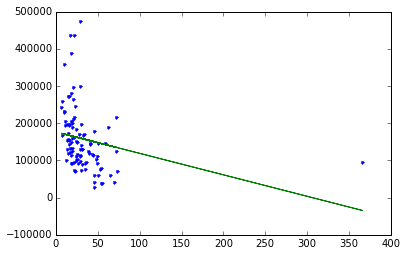

In [7]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',sales['CrimeRate'],crime_model.predict(sales),'-')

# Remove Center City and Redo the Analysis

In [10]:
sales_noCC = sales[sales['MilesPhila'] != 0.0]

In [11]:
sales_noCC.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

## Refit model

In [12]:
crime_model_noCC = graphlab.linear_regression.create(sales_noCC, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)

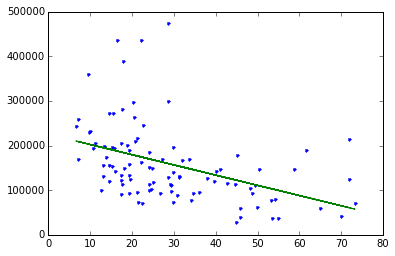

In [13]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',sales_noCC['CrimeRate'],crime_model_noCC.predict(sales_noCC),'-')